In [1]:
import pandas as pd
import mne
from mne.datasets import sample
from mne.io import Raw
import matplotlib.pyplot as plt
from mne.time_frequency import psd_array_multitaper
import numpy as np

In [2]:
data_path = sample.data_path() # neuroimaging data

In [3]:
print(data_path)

/Users/kvebers/mne_data/MNE-sample-data


In [4]:
raw_file = data_path / 'MEG/sample/sample_audvis_raw.fif'
raw = mne.io.read_raw_fif(str(raw_file), preload=True)

Opening raw data file /Users/kvebers/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


In [5]:
print(raw)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>


Using matplotlib as 2D backend.


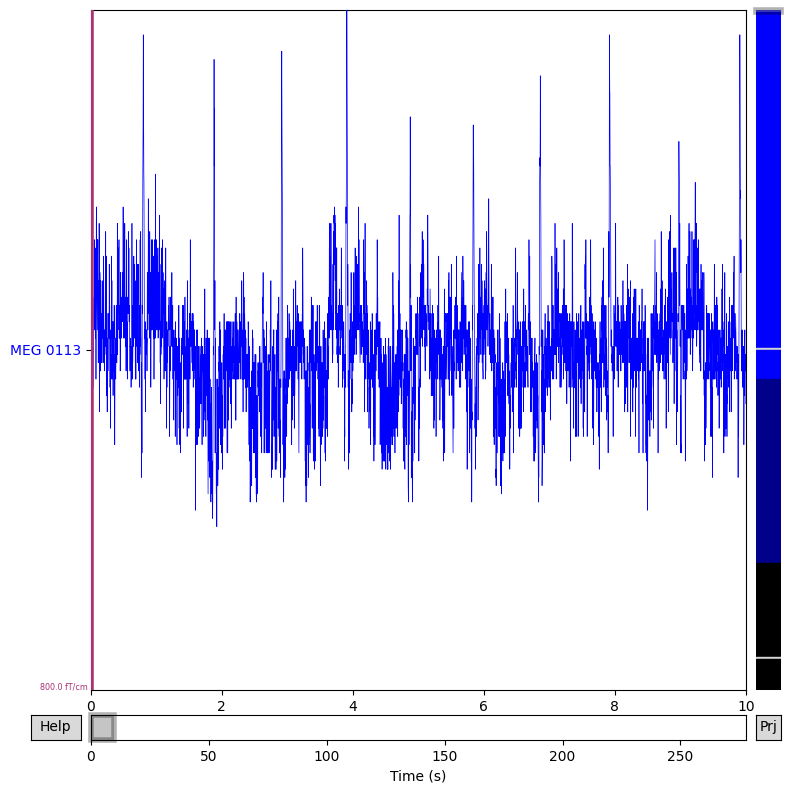

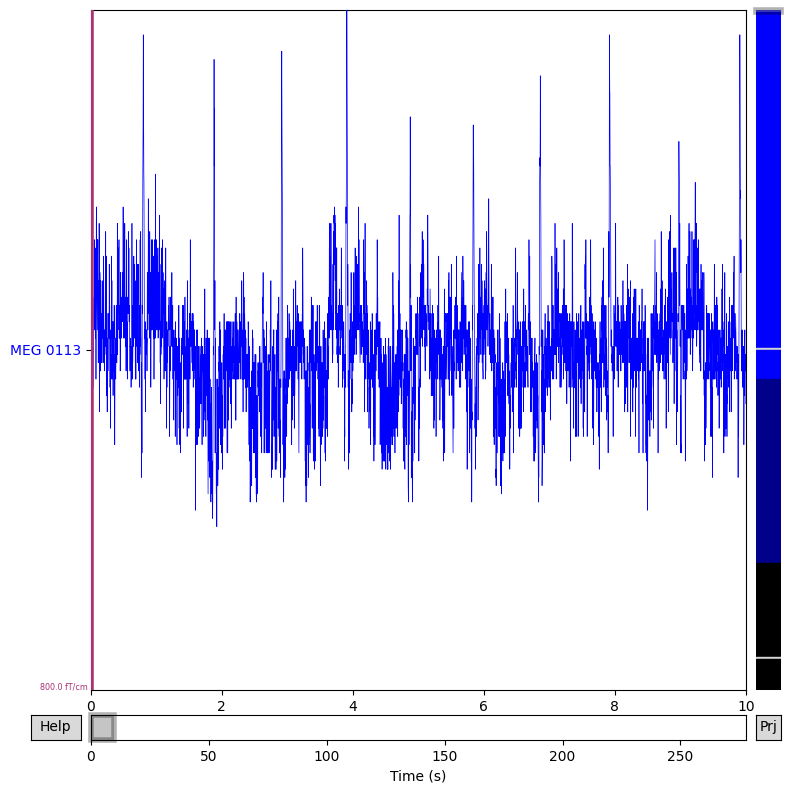

In [6]:
raw.plot(n_channels=1, duration=10, start=0) # this is how a single channal looks like

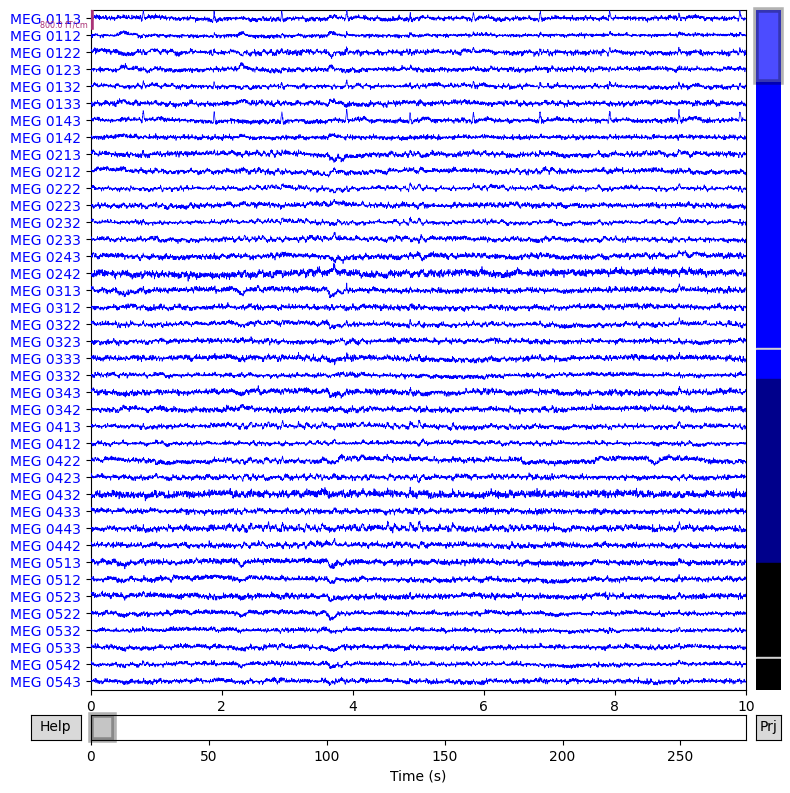

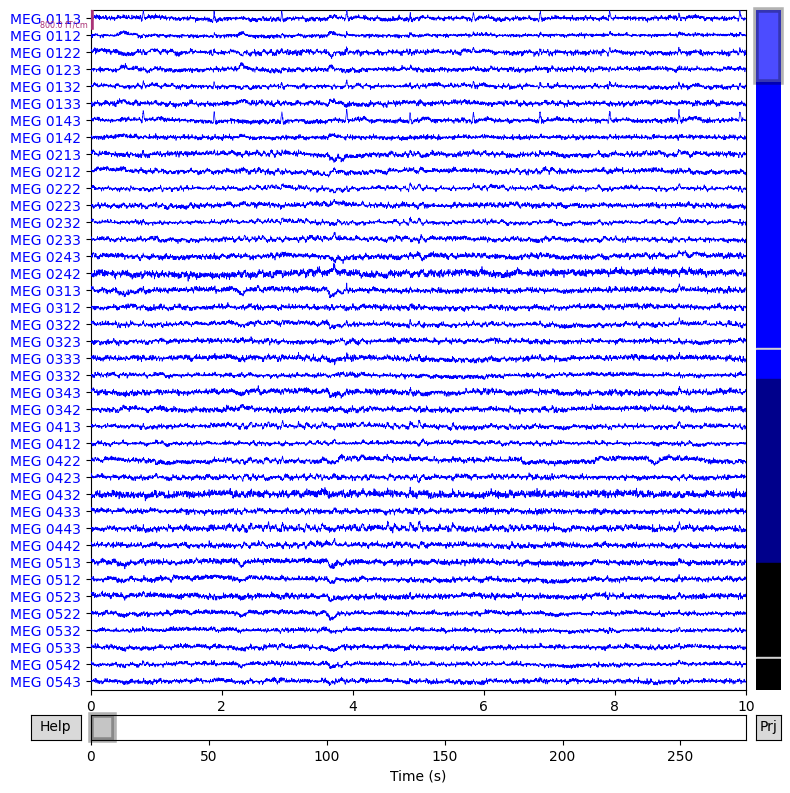

In [7]:
raw.plot(n_channels=40, duration=10, start=0) # this is how 40 channals look like

In [8]:
raw_filtered = raw.copy().filter(l_freq=8., h_freq=40.) # filtering from 8 to 40 , not good tho
# 8-12 Hz (Mu band): Relax
# 13 - 30 Hz (Beta band): Active Thinking
# 31 - 40 (Low Gamma Band) High Mental Activity

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 8 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 993 samples (1.653 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done 287 tasks      | elapsed:    1.2s


In [9]:
print(raw_filtered)

<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~481.8 MB, data loaded>


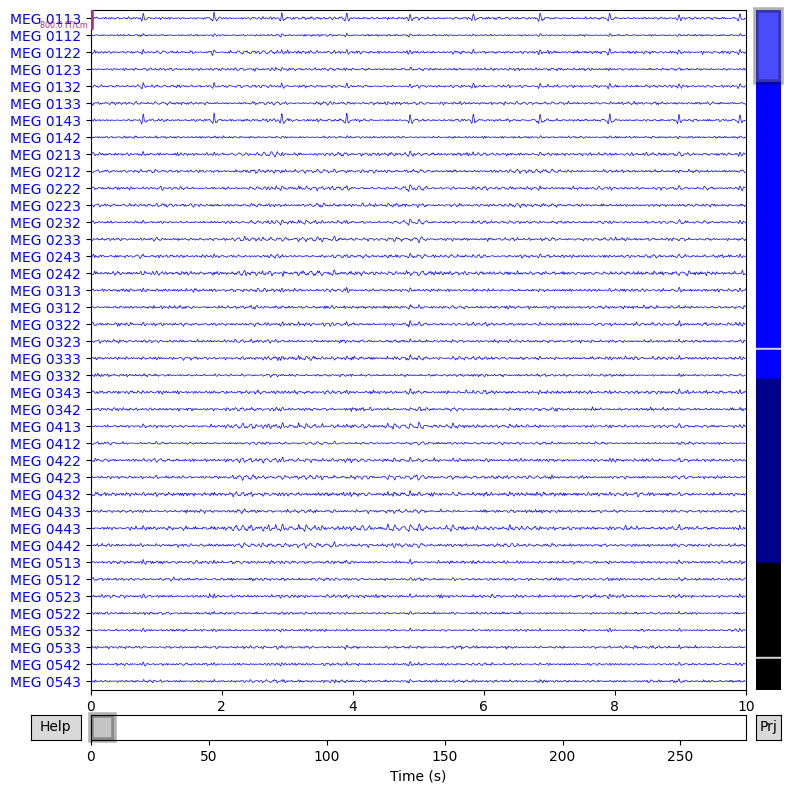

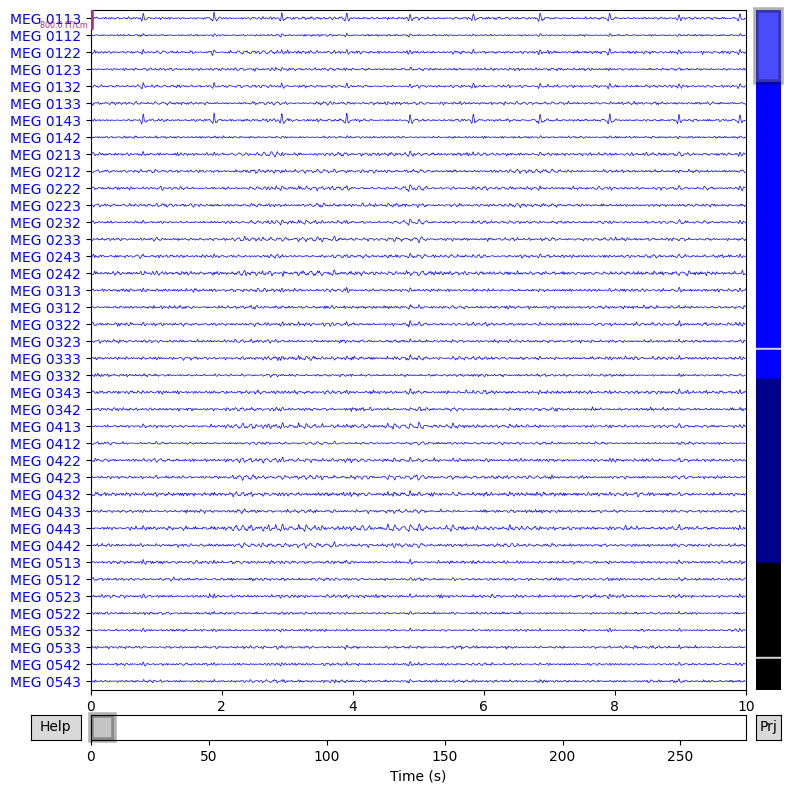

In [10]:
raw_filtered.plot(n_channels=40, duration=10, start=0) # this is how 40 channals look like

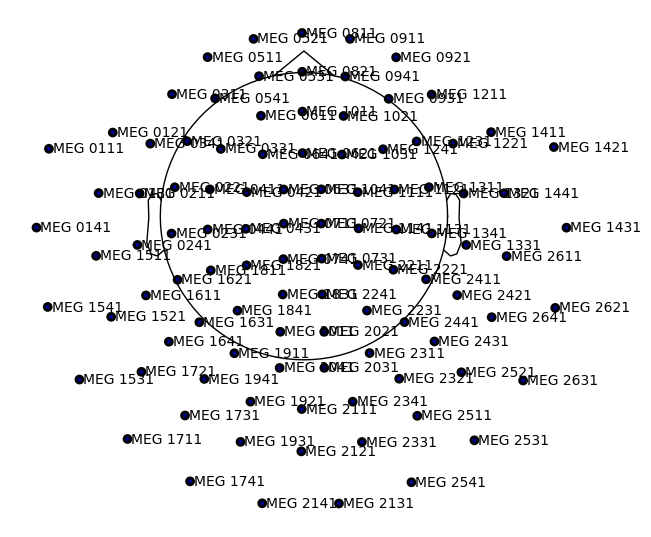

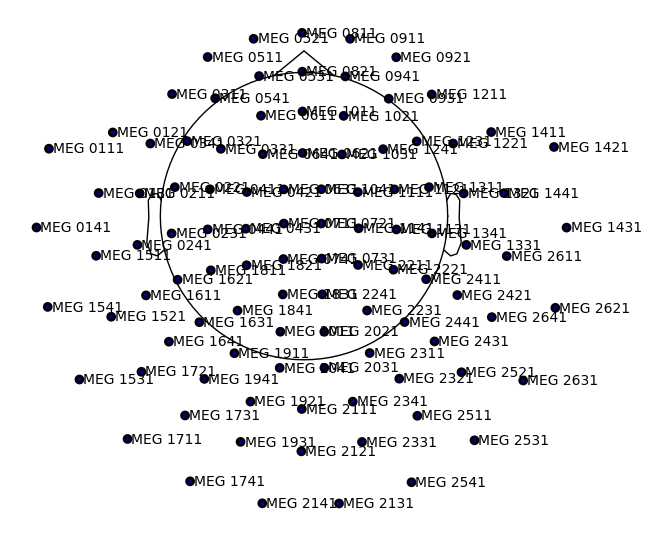

In [11]:
raw.plot_sensors(show_names=True)

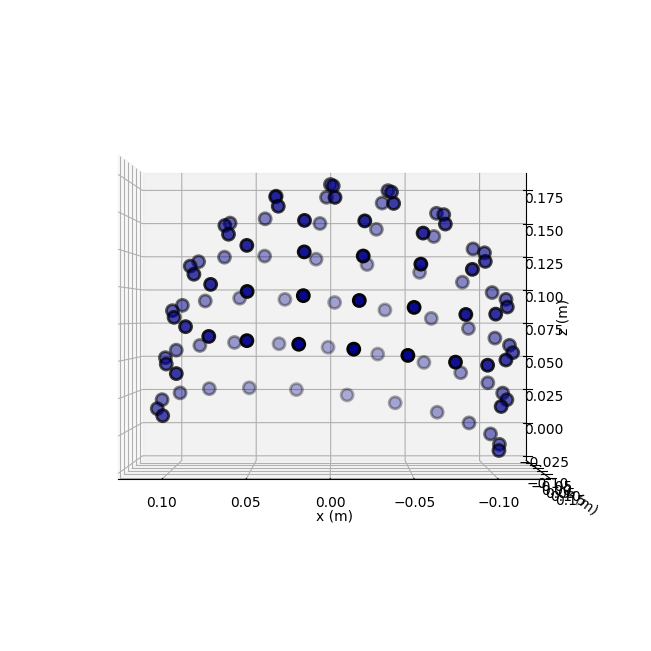

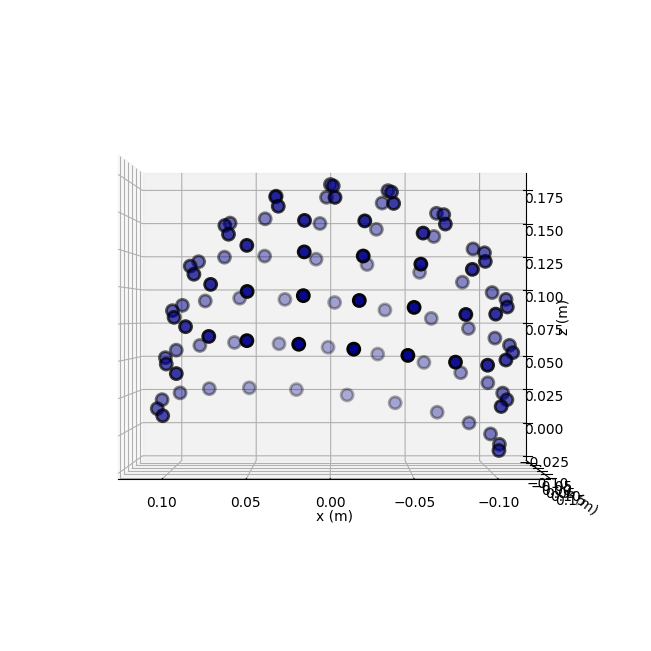

In [12]:
raw.plot_sensors(kind='3d')

In [13]:
print(raw.info)

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>


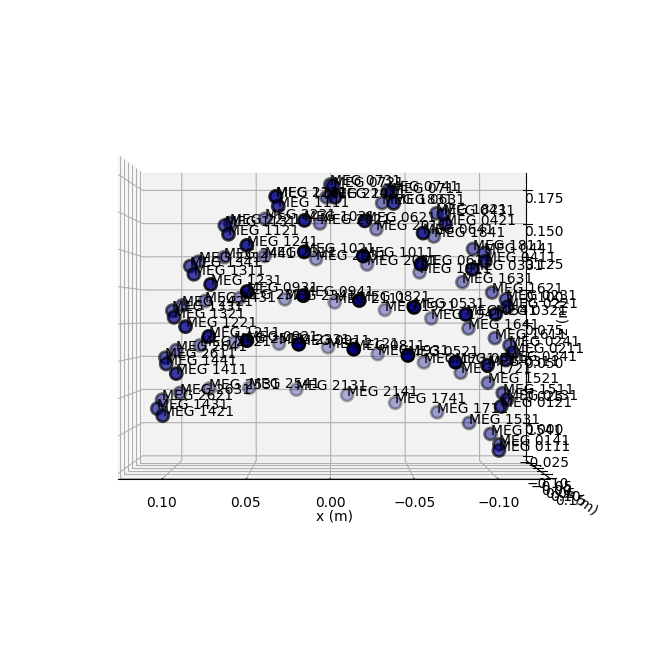

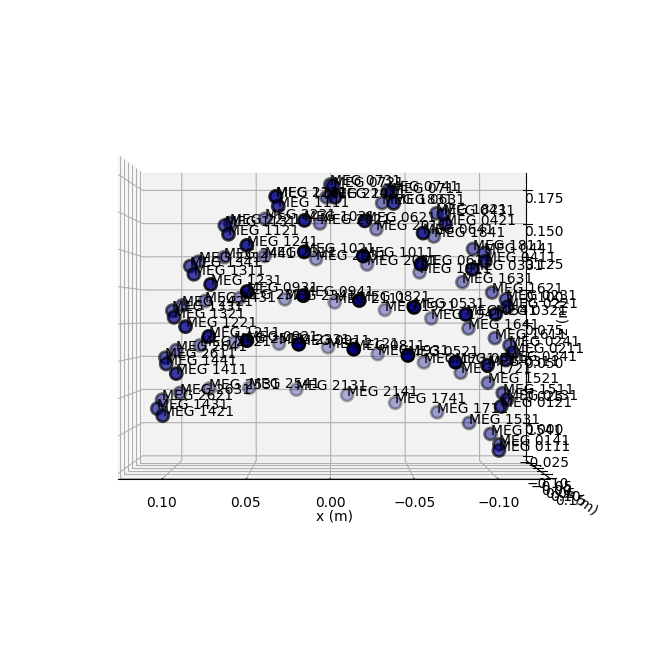

In [14]:
raw.plot_sensors(kind='3d', show_names='True')

In [15]:
print(mne.__version__)

1.7.0


In [16]:
root = mne.datasets.sample.data_path() / "MEG" / "sample"
evoked_file = root / "sample_audvis-ave.fif"
evokeds_list = mne.read_evokeds(
    evoked_file, baseline=(None, 0), proj=True, verbose=False
)


In [17]:
for e in evokeds_list:
    print(f"Condition: {e.comment}, baseline: {e.baseline}") # baseline delay for audio visual stimulation

Condition: Left Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Right Auditory, baseline: (-0.19979521315838786, 0.0)
Condition: Left visual, baseline: (-0.19979521315838786, 0.0)
Condition: Right visual, baseline: (-0.19979521315838786, 0.0)


In [18]:
conds = ("aud/left", "aud/right", "vis/left", "vis/right")
evks = dict(zip(conds, evokeds_list))

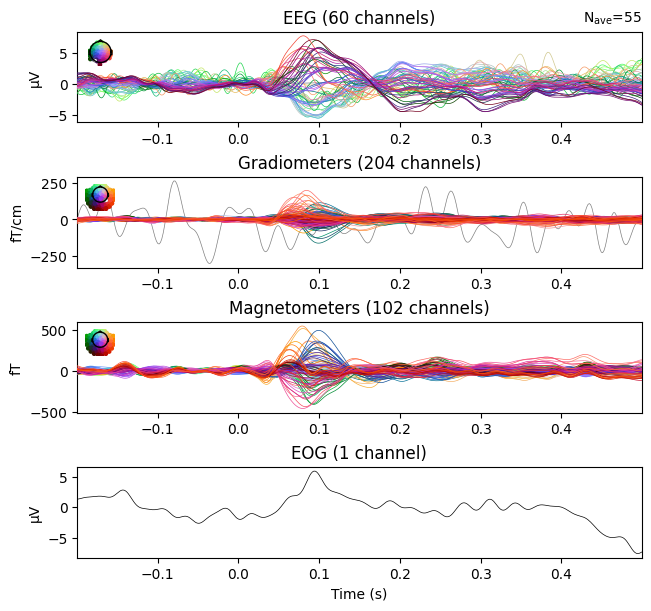

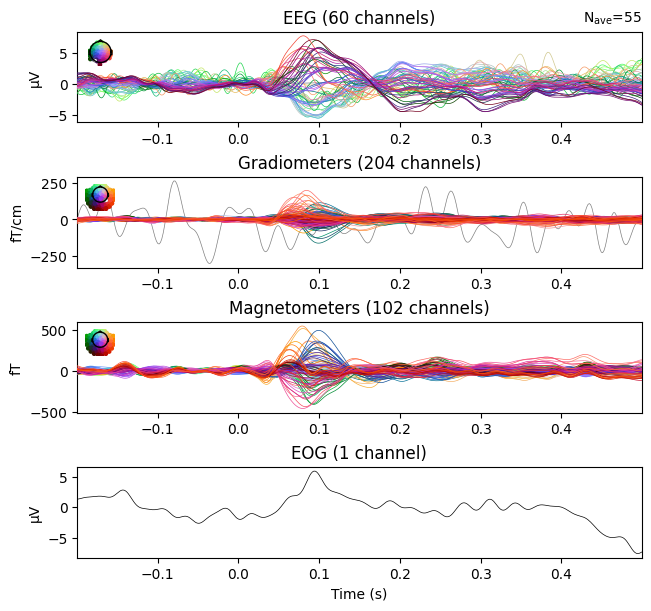

In [19]:
evks["aud/left"].plot(exclude=[])


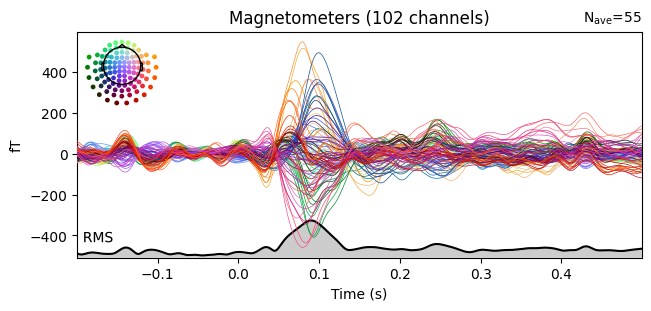

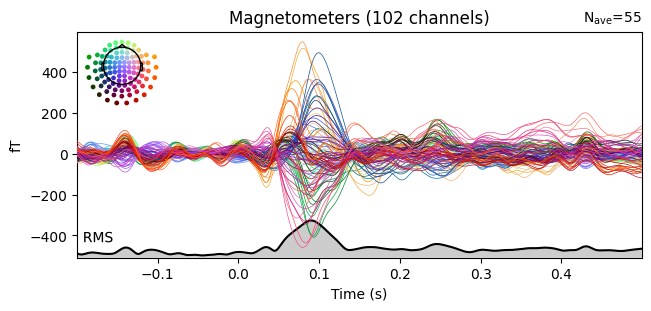

In [20]:
evks["aud/left"].plot(picks="mag", spatial_colors=True, gfp=True)


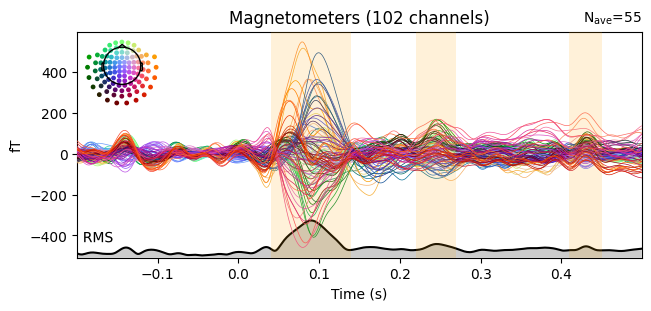

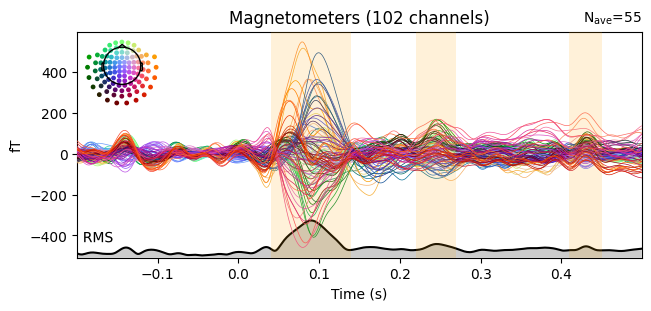

In [21]:
time_ranges_of_interest = [(0.04, 0.14), (0.22, 0.27), (0.41, 0.45)]
evks["aud/left"].plot(
    picks="mag", spatial_colors=True, gfp=True, highlight=time_ranges_of_interest
)

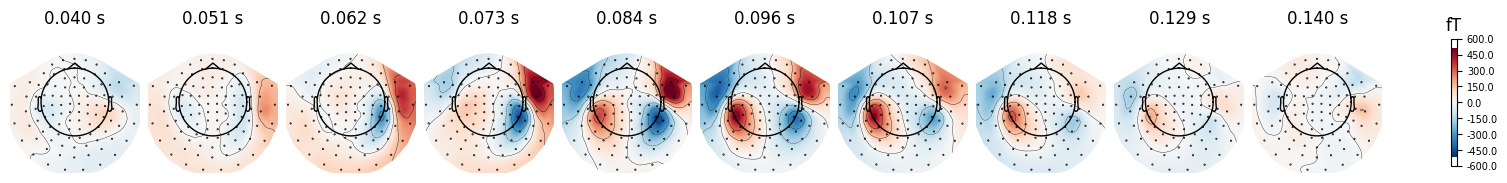

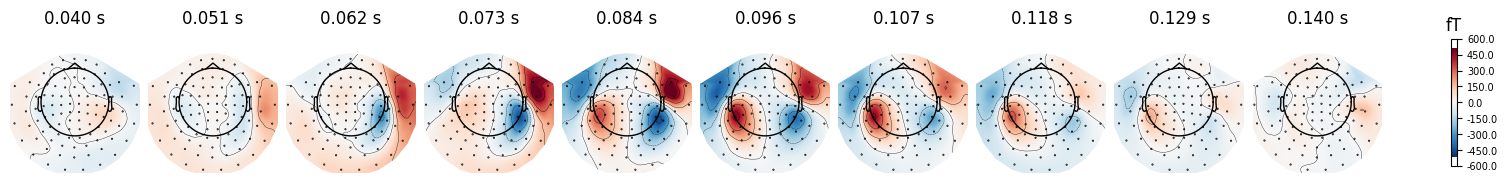

In [22]:
times = np.linspace(0.04, 0.14, 10)
evks["aud/left"].plot_topomap(ch_type="mag", times=times, colorbar=True)

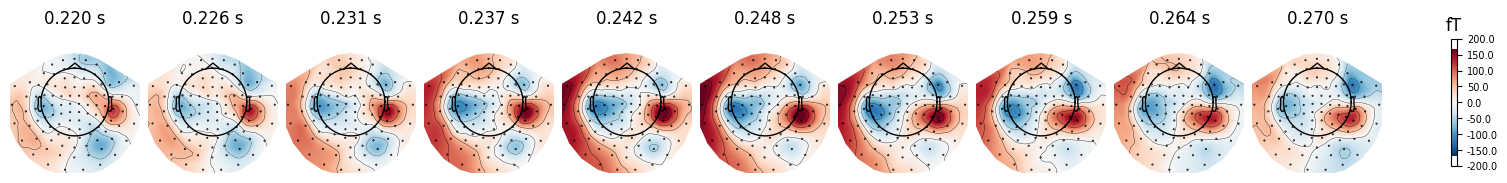

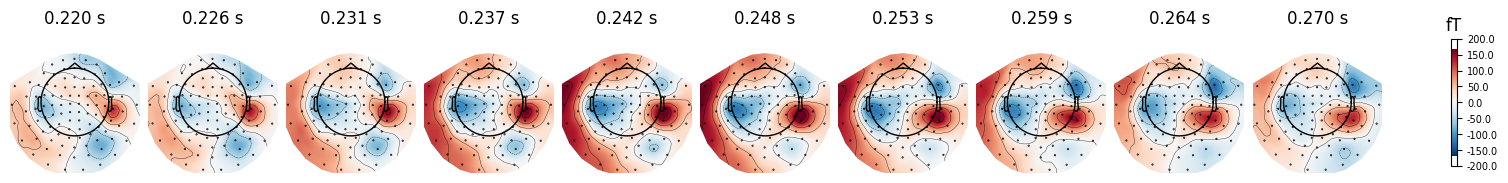

In [23]:
times = np.linspace(0.22, 0.27, 10)
evks["aud/left"].plot_topomap(ch_type="mag", times=times, colorbar=True)

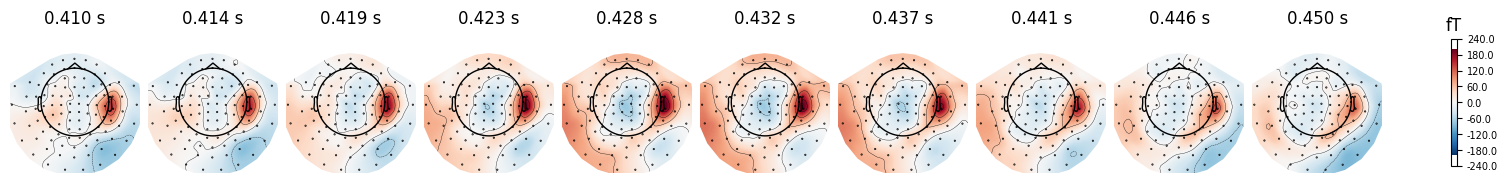

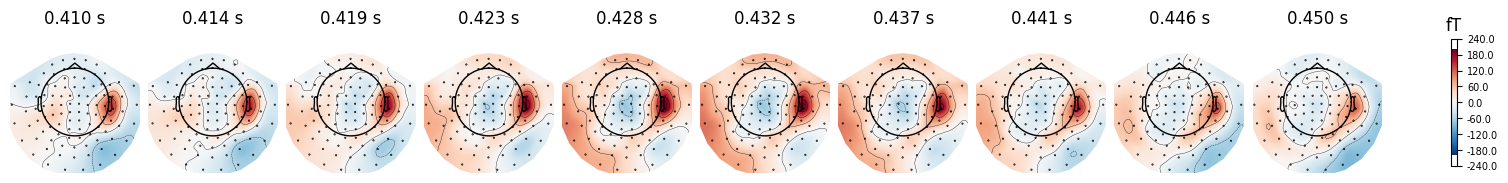

In [24]:
times = np.linspace(0.41, 0.45, 10)
evks["aud/left"].plot_topomap(ch_type="mag", times=times, colorbar=True)

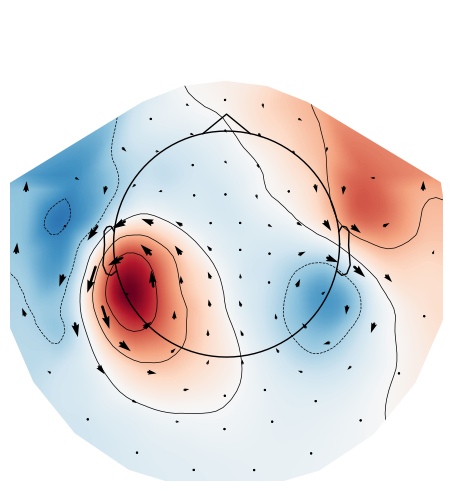

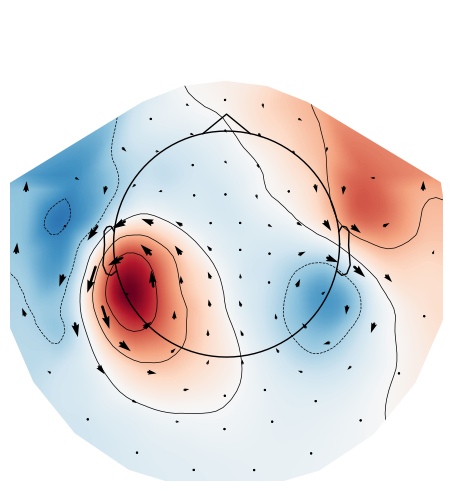

In [26]:
mags = evks["aud/left"].copy().pick(picks="mag")
mne.viz.plot_arrowmap(mags.data[:, 185], mags.info, extrapolate="local")

Projections have already been applied. Setting proj attribute to True.


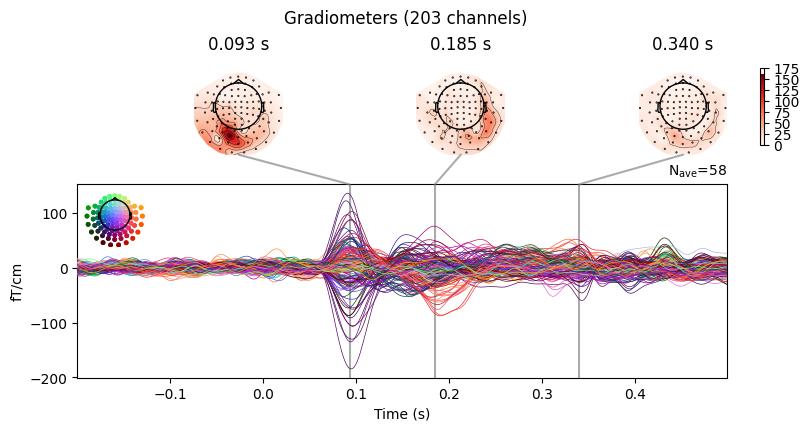

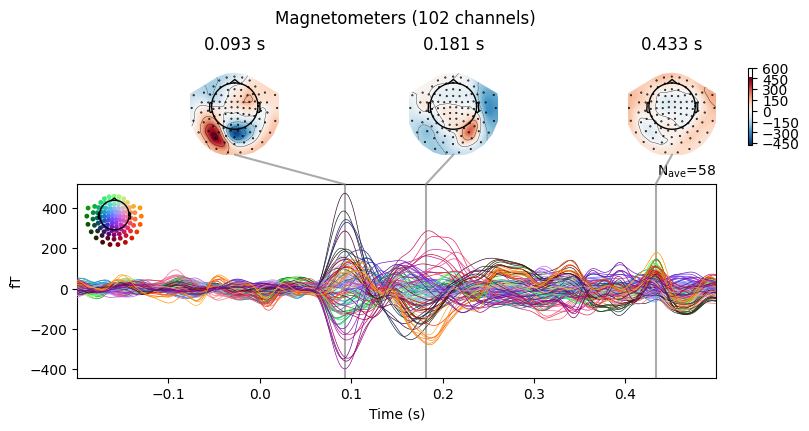

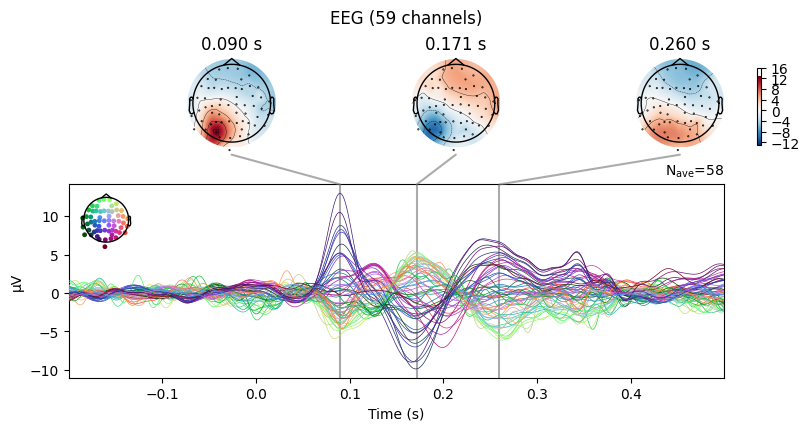

[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [27]:
evks["vis/right"].plot_joint()